In [1]:
import sys
import os
import arviz as az
import pandas as pd 
import numpy as np

# "/home/manalitta/d/ExpInfect_LinIV_PPRV/notebooks/analysis.ipynb" #linux path

# r"D:\ExpInfect_LinIV_PPRV\notebooks\analysis.ipynb" #windows path

notebook_path = os.path.abspath(r"D:\ExpInfect_LinIV_PPRV\notebooks\analysis.ipynb")
project_path = os.path.dirname(os.path.dirname(notebook_path))
sys.path.append(project_path)

In [2]:
from src.modeling.main import run_model, run_envelope
from src.utils.statistical_utils import  waic_comparison, calculate_ess, calculate_rhat

In [3]:
# Set your parameters here
baseline_data = 'baseline_data_bernoulli.csv'
baseline2_data = 'baseline_data_bernoulli.csv'
stratified_data = 'stratified_proximity_data.csv'
segmented_data = 'segmented_data.csv'
envelope_100cm_1 = 'envelope_100cm_1.csv'
envelope_100cm_2 = 'envelope_100cm_2.csv'

envelope_150cm_1 = 'envelope_150cm_1.csv'
envelope_150cm_2 = 'envelope_150cm_2.csv'

envelope_200cm_1 = 'envelope_200cm_1.csv'
envelope_200cm_2 = 'envelope_200cm_2.csv'

OUTPUT_DIR = r"D:\ExpInfect_LinIV_PPRV\results\models3"


#### Load all inference data of all models

In [4]:
trace_baseline = az.from_netcdf(f'{OUTPUT_DIR}/baseline_trace.nc')

trace_segmented_100cm = az.from_netcdf(f'{OUTPUT_DIR}/segmented_100cm_trace.nc')
trace_segmented_150cm = az.from_netcdf(f'{OUTPUT_DIR}/segmented_150cm_trace.nc')
trace_segmented_200cm = az.from_netcdf(f'{OUTPUT_DIR}/segmented_200cm_trace.nc')

trace_stratified1 = az.from_netcdf(f'{OUTPUT_DIR}/stratified1_trace.nc')
trace_stratified2 = az.from_netcdf(f'{OUTPUT_DIR}/stratified2_trace.nc')
trace_stratified3 = az.from_netcdf(f'{OUTPUT_DIR}/stratified3_trace.nc')


trace_stratified4 = az.from_netcdf(f'{OUTPUT_DIR}/stratified4_trace.nc')
trace_stratified5 = az.from_netcdf(f'{OUTPUT_DIR}/stratified5_trace.nc')

trace_envelope_100cm = az.from_netcdf(f'{OUTPUT_DIR}/envelope_100cm_trace.nc')
trace_envelope_150cm = az.from_netcdf(f'{OUTPUT_DIR}/envelope_150cm_trace.nc')
trace_envelope_200cm = az.from_netcdf(f'{OUTPUT_DIR}/envelope_200cm_trace.nc')



In [9]:
az.waic(trace_envelope_100cm)

Computed from 100000 posterior samples and 53 observations log-likelihood matrix.

          Estimate       SE
elpd_waic   -35.57     6.41
p_waic        1.27        -

# I. Running Inference on all experiments

## 1. Baseline model

In [4]:
sampling_params1 = {
    'draws': 10000,
    'tune': 1000,
    'chains': 10,
    'target_accept': 0.96
}

In [5]:
trace_baseline = run_model(baseline_data, 'baseline', 
                           sampling_params=sampling_params1,
                           output_dir=OUTPUT_DIR)

c:\Users\manal\miniconda3\envs\tf\lib\site-packages\pymc\data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Compiling...
Compilation time = 0:00:11.971848
Sampling...
Sampling time = 0:00:03.664183
Transforming variables...
Transformation time = 0:00:00.337953


In [7]:
trace_baseline.to_netcdf(f'{OUTPUT_DIR}/baseline_trace.nc')

'D:\\ExpInfect_LinIV_PPRV\\results\\models3/baseline_trace.nc'

In [8]:
az.summary(trace_baseline, round_to=4, hdi_prob = 0.95).to_csv(f'{OUTPUT_DIR}/baseline_summary.csv')

## 1. Baseline model 2

In [5]:
sampling_params1 = {
    'draws': 10000,
    'tune': 1000,
    'chains': 10,
    'target_accept': 0.96
}

In [6]:
trace_baseline2 = run_model(baseline_data, 'baseline2', 
                           sampling_params=sampling_params1,
                           output_dir=OUTPUT_DIR)

c:\Users\manal\miniconda3\envs\tf\lib\site-packages\pymc\data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Compiling...
Compilation time = 0:00:16.533789
Sampling...
Sampling time = 0:00:03.255699
Transforming variables...
Transformation time = 0:00:00.235406


c:\Users\manal\miniconda3\envs\tf\lib\site-packages\arviz\stats\density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<Axes: title={'center': 'lambda'}>,
        <Axes: title={'center': 'lambda'}>]], dtype=object)

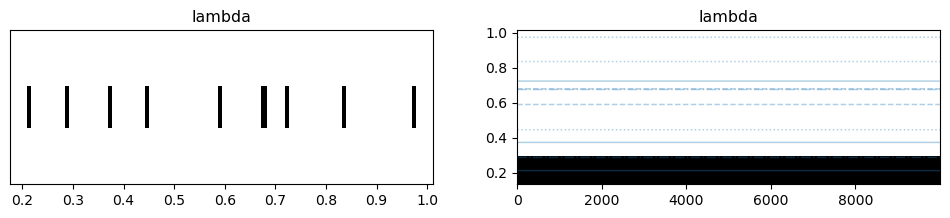

In [8]:
az.plot_trace(trace_baseline2, var_names=['lambda'], compact=True)

In [ ]:
trace_baseline2.to_netcdf(f'{OUTPUT_DIR}/baseline2_trace.nc')

In [ ]:
az.summary(trace_baseline2, round_to=4, hdi_prob = 0.95).to_csv(f'{OUTPUT_DIR}/baseline2_summary.csv')

## 2. Segmented models

In [9]:
sampling_params2 = {
    'draws': 10000,
    'tune': 1000,
    'chains': 10,
    'target_accept': 0.95,
}

In [10]:
segmented_100cm = run_model(segmented_data, 'segmented_100cm', 
                           sampling_params=sampling_params2,
                           output_dir=OUTPUT_DIR)

c:\Users\manal\miniconda3\envs\tf\lib\site-packages\pymc\data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Compiling...
Compilation time = 0:00:03.036112
Sampling...
Sampling time = 0:00:03.700165
Transforming variables...
Transformation time = 0:00:00.281962


In [11]:
az.summary(segmented_100cm, round_to=4, hdi_prob = 0.95).to_csv(f'{OUTPUT_DIR}/segmented_100cm_summary.csv')

In [12]:
segmented_100cm.to_netcdf(f'{OUTPUT_DIR}/segmented_100cm_trace.nc')

'D:\\ExpInfect_LinIV_PPRV\\results\\models3/segmented_100cm_trace.nc'

In [13]:
segmented_150cm = run_model(segmented_data, 'segmented_150cm', 
                            sampling_params=sampling_params2,
                            output_dir=OUTPUT_DIR)

c:\Users\manal\miniconda3\envs\tf\lib\site-packages\pymc\data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Compiling...
Compilation time = 0:00:02.131934
Sampling...
Sampling time = 0:00:03.532458
Transforming variables...
Transformation time = 0:00:00.264527


In [14]:
segmented_150cm.to_netcdf(f'{OUTPUT_DIR}/segmented_150cm_trace.nc')

'D:\\ExpInfect_LinIV_PPRV\\results\\models3/segmented_150cm_trace.nc'

In [15]:
az.summary(segmented_150cm, round_to=4, hdi_prob = 0.95).to_csv(f'{OUTPUT_DIR}/segmented_150cm_summary.csv')

In [16]:
segmented_200cm = run_model(segmented_data, 'segmented_200cm', 
                           sampling_params=sampling_params2,
                           output_dir=OUTPUT_DIR)

c:\Users\manal\miniconda3\envs\tf\lib\site-packages\pymc\data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Compiling...
Compilation time = 0:00:02.157484
Sampling...
Sampling time = 0:00:03.643431
Transforming variables...
Transformation time = 0:00:00.277417


In [17]:
az.summary(segmented_200cm, round_to=4, hdi_prob = 0.95).to_csv(f'{OUTPUT_DIR}/segmented_200cm_summary.csv')

In [18]:
segmented_200cm.to_netcdf(f'{OUTPUT_DIR}/segmented_200cm_trace.nc')

'D:\\ExpInfect_LinIV_PPRV\\results\\models3/segmented_200cm_trace.nc'

## 3. Stratified models

In [19]:
sampling_params = {
    'draws': 10000,
    'tune': 1000,
    'chains': 10,
    'target_accept': 0.96,
    'initvals' : {'p': 0.001}
}

In [21]:
stratified1 = run_model(stratified_data, 'stratified1', 
                           sampling_params=sampling_params,
                           output_dir=OUTPUT_DIR)

c:\Users\manal\miniconda3\envs\tf\lib\site-packages\pymc\data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Compiling...
Compilation time = 0:00:07.420328
Sampling...
Sampling time = 0:00:13.550184
Transforming variables...
Transformation time = 0:00:00.754362


In [22]:
stratified1.to_netcdf(f'{OUTPUT_DIR}/stratified1_trace.nc')

'D:\\ExpInfect_LinIV_PPRV\\results\\models3/stratified1_trace.nc'

In [23]:
stratified2 = run_model(stratified_data, 'stratified2', 
                           sampling_params=sampling_params,
                           output_dir=OUTPUT_DIR)

c:\Users\manal\miniconda3\envs\tf\lib\site-packages\pymc\data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Compiling...
Compilation time = 0:00:03.057393
Sampling...
Sampling time = 0:00:05.472615
Transforming variables...
Transformation time = 0:00:00.402385


In [29]:
stratified2.to_netcdf(f'{OUTPUT_DIR}/stratified2_trace.nc')

'D:\\ExpInfect_LinIV_PPRV\\results\\models3/stratified2_trace.nc'

In [30]:
stratified3 = run_model(stratified_data, 'stratified3', 
                           sampling_params=sampling_params,
                           output_dir=OUTPUT_DIR)

c:\Users\manal\miniconda3\envs\tf\lib\site-packages\pymc\data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Compiling...
Compilation time = 0:00:02.888035
Sampling...
Sampling time = 0:00:05.751341
Transforming variables...
Transformation time = 0:00:00.413066


In [31]:
stratified3.to_netcdf(f'{OUTPUT_DIR}/stratified3_trace.nc')

'D:\\ExpInfect_LinIV_PPRV\\results\\models3/stratified3_trace.nc'

In [32]:
stratified4= run_model(stratified_data, 'stratified4', 
                           sampling_params=sampling_params,
                           output_dir=OUTPUT_DIR)

c:\Users\manal\miniconda3\envs\tf\lib\site-packages\pymc\data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Compiling...
Compilation time = 0:00:10.982096
Sampling...
Sampling time = 0:00:08.560500
Transforming variables...
Transformation time = 0:00:00.582110


In [33]:
stratified4.to_netcdf(f'{OUTPUT_DIR}/stratified4_trace.nc')

'D:\\ExpInfect_LinIV_PPRV\\results\\models3/stratified4_trace.nc'

In [34]:
stratified5 = run_model(stratified_data, 'stratified5', 
                           sampling_params=sampling_params,
                           output_dir=OUTPUT_DIR)

c:\Users\manal\miniconda3\envs\tf\lib\site-packages\pymc\data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Compiling...
Compilation time = 0:00:04.226982
Sampling...
Sampling time = 0:00:09.016781
Transforming variables...
Transformation time = 0:00:00.599525


In [35]:
stratified5.to_netcdf(f'{OUTPUT_DIR}/stratified5_trace.nc')

'D:\\ExpInfect_LinIV_PPRV\\results\\models3/stratified5_trace.nc'

In [37]:
az.summary(stratified1, round_to=4, hdi_prob = 0.95).to_csv(f'{OUTPUT_DIR}/stratified1_summary.csv')
az.summary(stratified2, round_to=4, hdi_prob = 0.95).to_csv(f'{OUTPUT_DIR}/stratified2_summary.csv')
az.summary(stratified3, round_to=4, hdi_prob = 0.95).to_csv(f'{OUTPUT_DIR}/stratified3_summary.csv')
az.summary(stratified4, round_to=4, hdi_prob = 0.95).to_csv(f'{OUTPUT_DIR}/stratified4_summary.csv')
az.summary(stratified5, round_to=4, hdi_prob = 0.95).to_csv(f'{OUTPUT_DIR}/stratified5_summary.csv')

## 4. Envelope models

In [38]:
sampling_params4 = {
    'draws': 10000,
    'tune': 1000,
    'chains': 10,
    'target_accept': 0.96,
    'initvals' : {'p0': 0.001, 'lambda': 0.1}
}

In [39]:
envelope_100cm = run_envelope(envelope_100cm_1, envelope_100cm_2, 'envelope', 
                              sampling_params=sampling_params4,
                              output_dir=OUTPUT_DIR)

Compiling...
Compilation time = 0:00:30.626102
Sampling...
Sampling time = 0:00:58.617399
Transforming variables...
Transformation time = 0:00:08.479513


In [40]:
az.summary(envelope_100cm, round_to=4, hdi_prob = 0.95).to_csv(f'{OUTPUT_DIR}/envelope_100cm_summary.csv')

In [41]:
envelope_150cm = run_envelope(envelope_150cm_1, envelope_150cm_2, 'envelope', 
                              sampling_params=sampling_params4,
                              output_dir=OUTPUT_DIR)

Compiling...
Compilation time = 0:00:36.843668
Sampling...
Sampling time = 0:02:14.567988
Transforming variables...
Transformation time = 0:00:18.937909


In [42]:
az.summary(envelope_150cm, round_to=4, hdi_prob = 0.95).to_csv(f'{OUTPUT_DIR}/envelope_150cm_summary.csv')

In [43]:
envelope_200cm = run_envelope(envelope_200cm_1, envelope_200cm_2, 'envelope', 
                              sampling_params=sampling_params4,
                              output_dir=OUTPUT_DIR)

Compiling...
Compilation time = 0:00:34.461900
Sampling...
Sampling time = 0:02:52.196646
Transforming variables...
Transformation time = 0:00:31.113616


In [44]:
az.summary(envelope_200cm, round_to=4, hdi_prob = 0.95).to_csv(f'{OUTPUT_DIR}/envelope_200cm_summary.csv')

In [45]:
envelope_100cm.to_netcdf(f'{OUTPUT_DIR}/envelope_100cm_trace.nc')
envelope_150cm.to_netcdf(f'{OUTPUT_DIR}/envelope_150cm_trace.nc')
envelope_200cm.to_netcdf(f'{OUTPUT_DIR}/envelope_200cm_trace.nc')

'D:\\ExpInfect_LinIV_PPRV\\results\\models3/envelope_200cm_trace.nc'

# II. Models convergence check 

# II. Models comparison 

## 1. Models comparison using WAIC metric

In [47]:
model_names = ['baseline', 
               'segmented_100cm', 'segmented_150cm', 'segmented_200cm',
                'envelope_150cm', 'envelope_200cm',
               'stratified1', 'stratified2', 'stratified3', 'stratified4', 'stratified5']


traces = [trace_baseline, 
          trace_segmented_100cm, trace_segmented_150cm, trace_segmented_200cm,
             trace_envelope_150cm, trace_envelope_200cm,
          trace_stratified1, trace_stratified2, trace_stratified3, trace_stratified4, trace_stratified5]

In [48]:
waic = waic_comparison(traces, model_names)

c:\Users\manal\miniconda3\envs\tf\lib\site-packages\arviz\stats\stats.py:309: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
c:\Users\manal\miniconda3\envs\tf\lib\site-packages\arviz\stats\stats.py:309: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'log' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (


In [49]:
waic

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
baseline,0,-27.927606,0.879216,0.000000,7.975253e-01,2.450483,0.000000,False,log
stratified3,1,-28.772522,1.147348,0.844916,2.498631e-02,3.288096,1.763044,False,log
stratified4,2,-28.875432,1.299500,0.947826,1.774884e-01,3.323898,1.863870,False,log
stratified1,3,-28.949558,1.254875,1.021952,1.530789e-15,3.388080,1.903510,False,log
segmented_200cm,4,-31.519743,1.040295,3.592138,0.000000e+00,3.745041,2.610647,False,log
envelope_200cm,5,-32.105763,1.068848,4.178157,2.889585e-16,4.046546,2.973678,False,log
stratified5,6,-32.293408,1.298012,4.365802,3.680224e-16,4.018988,2.874084,False,log
segmented_150cm,7,-34.921333,1.100446,6.993727,3.182464e-16,5.413254,4.496328,False,log
envelope_150cm,8,-35.284618,1.120025,7.357012,2.479032e-16,5.607881,4.676634,False,log
segmented_100cm,9,-35.549950,1.067134,7.622344,4.538995e-16,5.517890,4.490884,False,log


In [50]:
waic.to_csv(f'{OUTPUT_DIR}/waic_comparison.csv')

In [51]:
az.waic(trace_envelope_100cm, pointwise=True)

Computed from 100000 posterior samples and 53 observations log-likelihood matrix.

          Estimate       SE
elpd_waic   -35.57     6.41
p_waic        1.27        -

In [52]:
-27.93 - (-35.57 )

7.640000000000001

## 2. Model comparison using AUC metric

In [123]:
from src.modeling.predicted_probas import run_predictions
from src.utils.statistical_utils import calculate_hdi, calculate_auc

### baseline

In [54]:
baseline_probas = run_predictions(trace_baseline, 'probs')

In [55]:
baseline_probas.to_csv(f'{OUTPUT_DIR}/baseline_probas.csv')

In [56]:
y_true = pd.read_csv(r'D:\ExpInfect_LinIV_PPRV\data\processed3\baseline_data_bernoulli.csv')['infected']
np.save(f'{OUTPUT_DIR}/y_true_corrected.npy', y_true.values)

In [57]:
y_true = np.load(f'{OUTPUT_DIR}/y_true_corrected.npy')

In [58]:
baseline_probas = pd.read_csv(f'{OUTPUT_DIR}/baseline_probas.csv')

In [59]:
auc_baseline = calculate_auc(baseline_probas, y_true)

In [105]:
calculate_hdi(auc_baseline)

array([0.84, 0.84])

In [60]:
np.round(np.mean(auc_baseline), 2)

0.84

In [106]:
np.round(np.std(auc_baseline), 2)

0.0

### segmented 100 cm

In [62]:
auc_segmented_100cm = calculate_auc(run_predictions(trace_segmented_100cm, 'probs'), y_true)

In [63]:
calculate_hdi(auc_segmented_100cm)

array([0.67, 0.67])

In [64]:
np.round(np.mean(auc_segmented_100cm), 2)

0.67

In [65]:
np.round(np.std(auc_segmented_100cm), 2)

0.0

### segmented 150

In [66]:
auc_segmented_150cm = calculate_auc(run_predictions(trace_segmented_150cm, 'probs'), y_true)
calculate_hdi(auc_segmented_150cm)

array([0.68, 0.68])

In [67]:
np.round(np.mean(auc_segmented_150cm), 2)

0.68

In [68]:
np.round(np.std(auc_segmented_150cm), 2)

0.0

### segmented 200

In [69]:
auc_segmented_200cm = calculate_auc(run_predictions(trace_segmented_200cm, 'probs'), y_true)
calculate_hdi(auc_segmented_200cm)

array([0.73, 0.73])

In [70]:
np.round(np.mean(auc_segmented_200cm), 2)

0.73

In [71]:
np.round(np.std(auc_segmented_200cm), 2)

0.0

### envelope 100

In [74]:
y_true_env = pd.read_csv(r'D:\ExpInfect_LinIV_PPRV\data\processed3\envelope_100cm_2.csv')['infected']

In [75]:
auc_envelope_100cm = calculate_auc(run_predictions(trace_envelope_100cm, 'probs'), y_true_env)
calculate_hdi(auc_envelope_100cm)

array([0.65, 0.65])

In [76]:
np.round(np.mean(auc_envelope_100cm), 2)

0.65

In [77]:
np.round(np.std(auc_envelope_100cm), 2)

0.0

### envelope 150

In [78]:
auc_envelope_150cm = calculate_auc(run_predictions(trace_envelope_150cm, 'probs'), y_true)
calculate_hdi(auc_envelope_150cm)

array([0.68, 0.68])

In [79]:
np.round(np.mean(auc_envelope_150cm), 2)

0.68

In [80]:
np.round(np.std(auc_envelope_150cm), 2)

0.0

### envelope 200

In [81]:
auc_envelope_200cm = calculate_auc(run_predictions(trace_envelope_200cm, 'probs'), y_true)
calculate_hdi(auc_envelope_200cm)

array([0.72, 0.72])

In [82]:
np.round(np.mean(auc_envelope_200cm), 2)

0.72

In [83]:
np.round(np.std(auc_envelope_200cm), 2)

0.0

### stratified 1

In [84]:
auc_stratified1 = calculate_auc(run_predictions(trace_stratified1, 'p_i'), y_true)
calculate_hdi(auc_stratified1)

array([0.76, 0.84])

In [85]:
np.round(np.mean(auc_stratified1), 2)

0.81

In [86]:
np.round(np.std(auc_stratified1), 2)

0.02

### stratified 2

In [87]:
auc_stratified2 = calculate_auc(run_predictions(trace_stratified2, 'p_i'), y_true)
calculate_hdi(auc_stratified2)

array([0.64, 0.67])

In [88]:
np.round(np.mean(auc_stratified2), 2)

0.66

In [89]:
np.round(np.std(auc_stratified2), 2)

0.01

### stratified 3

In [90]:
auc_stratified3 = calculate_auc(run_predictions(trace_stratified3, 'p_i'), y_true)
calculate_hdi(auc_stratified3)

array([0.78, 0.83])

In [91]:
np.round(np.mean(auc_stratified3), 2)

0.81

In [92]:
np.round(np.std(auc_stratified3), 2)

0.01

### stratified 4

In [93]:
auc_stratified4 = calculate_auc(run_predictions(trace_stratified4, 'p_i'), y_true)
calculate_hdi(auc_stratified4)

array([0.76, 0.84])

In [94]:
np.round(np.mean(auc_stratified4), 2)

0.82

In [95]:
np.round(np.std(auc_stratified4), 2)

0.02

### stratified 5

In [96]:
auc_stratified5 = calculate_auc(run_predictions(trace_stratified5, 'p_i'), y_true)
calculate_hdi(auc_stratified5)

array([0.68, 0.73])

In [97]:
np.round(np.mean(auc_stratified5), 2)

0.71

In [98]:
np.round(np.std(auc_stratified5), 2)

0.02

In [99]:
run_predictions(trace_segmented_100cm, 'probs').to_csv(f'{OUTPUT_DIR}/segmented_100cm_probas.csv')
run_predictions(trace_segmented_150cm, 'probs').to_csv(f'{OUTPUT_DIR}/segmented_150cm_probas.csv')
run_predictions(trace_segmented_200cm, 'probs').to_csv(f'{OUTPUT_DIR}/segmented_200cm_probas.csv')
run_predictions(trace_envelope_100cm, 'probs').to_csv(f'{OUTPUT_DIR}/envelope_100cm_probas.csv')
run_predictions(trace_envelope_150cm, 'probs').to_csv(f'{OUTPUT_DIR}/envelope_150cm_probas.csv')
run_predictions(trace_envelope_200cm, 'probs').to_csv(f'{OUTPUT_DIR}/envelope_200cm_probas.csv')

In [100]:
run_predictions(trace_stratified1, 'p_i').to_csv(f'{OUTPUT_DIR}/stratified1_probas.csv')
run_predictions(trace_stratified2, 'p_i').to_csv(f'{OUTPUT_DIR}/stratified2_probas.csv')
run_predictions(trace_stratified3, 'p_i').to_csv(f'{OUTPUT_DIR}/stratified3_probas.csv')
run_predictions(trace_stratified4, 'p_i').to_csv(f'{OUTPUT_DIR}/stratified4_probas.csv')
run_predictions(trace_stratified5, 'p_i').to_csv(f'{OUTPUT_DIR}/stratified5_probas.csv')


In [101]:
segmented_100cm_probas = pd.read_csv(f'{OUTPUT_DIR}/segmented_100cm_probas.csv')
segmented_150cm_probas = pd.read_csv(f'{OUTPUT_DIR}/segmented_150cm_probas.csv')
segmented_200cm_probas = pd.read_csv(f'{OUTPUT_DIR}/segmented_200cm_probas.csv')
envelope_100cm_probas = pd.read_csv(f'{OUTPUT_DIR}/envelope_100cm_probas.csv')
envelope_150cm_probas = pd.read_csv(f'{OUTPUT_DIR}/envelope_150cm_probas.csv')
envelope_200cm_probas = pd.read_csv(f'{OUTPUT_DIR}/envelope_200cm_probas.csv')
stratified1_probas = pd.read_csv(f'{OUTPUT_DIR}/stratified1_probas.csv')
stratified2_probas = pd.read_csv(f'{OUTPUT_DIR}/stratified2_probas.csv')
stratified3_probas = pd.read_csv(f'{OUTPUT_DIR}/stratified3_probas.csv')
stratified4_probas = pd.read_csv(f'{OUTPUT_DIR}/stratified4_probas.csv')
stratified5_probas = pd.read_csv(f'{OUTPUT_DIR}/stratified5_probas.csv')

In [102]:
baseline_probas = pd.read_csv(f'{OUTPUT_DIR}/baseline_probas.csv')

## ROC Curves

In [110]:
from sklearn.metrics import roc_curve
def calculate_mean_roc(df, y_true, label, mean_auc, color):
    fpr_list = []
    tpr_list = []
    
    # Calculate ROC 
    for col in df.columns:
        y_pred = df[col].values
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        fpr_list.append(fpr)
        tpr_list.append(tpr)

    # Define a common set of FPR values for interpolation
    fpr_common = np.linspace(0, 1, 100)

    # Interpolate all TPR values at these common FPR points
    tpr_interpolated = np.zeros((len(df.columns), len(fpr_common)))

    for i in range(len(df.columns)):
        tpr_interpolated[i, :] = np.interp(fpr_common, fpr_list[i], tpr_list[i])

    # Calculate mean TPR and the confidence intervals (e.g., 95% CI)
    mean_tpr = np.mean(tpr_interpolated, axis=0)
    # tpr_lower = np.percentile(tpr_interpolated, 2.5, axis=0)
    # tpr_upper = np.percentile(tpr_interpolated, 97.5, axis=0)

    # Plot the mean ROC curve and the confidence intervals
    # sns.lineplot(x=fpr_common, y=mean_tpr, color=color, label=f'Mean ROC (AUC = {mean_auc})')
    plt.plot(fpr_common, mean_tpr, label=f'{label} Mean ROC (AUC = {mean_auc})', color=color)
    # plt.fill_between(fpr_common, tpr_lower, tpr_upper, color=color, alpha=0.2)

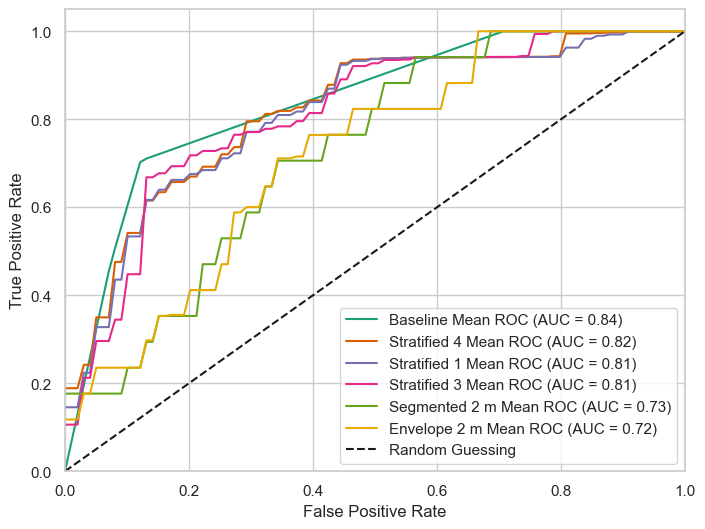

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Dark2")


plt.figure(figsize=(8, 6))

calculate_mean_roc(baseline_probas, y_true, label='Baseline', mean_auc=0.84, color=colors[0])

calculate_mean_roc(stratified4_probas, y_true,  label='Stratified 4', mean_auc=0.82, color=colors[1])

calculate_mean_roc(stratified1_probas, y_true,  label='Stratified 1', mean_auc=0.81, color=colors[2])

calculate_mean_roc(stratified3_probas, y_true,  label='Stratified 3', mean_auc=0.81, color=colors[3])

calculate_mean_roc(segmented_200cm_probas, y_true,  label='Segmented 2 m', mean_auc=0.73, color=colors[4])

calculate_mean_roc(envelope_200cm_probas, y_true,  label='Envelope 2 m', mean_auc=0.72, color=colors[5])


# Diagonal line (random guessing)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')


# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig("roc_curve.tiff", dpi = 350, bbox_inches='tight')

## Quality of fit of different models against real observations

In [124]:
from src.modeling.predicted_cases2 import run_predictions

In [125]:
# Set your parameters here
baseline_probas = 'baseline_probas.csv'

stratified4_probas = 'stratified4_probas.csv'

stratified3_probas  = 'stratified3_probas.csv'

stratified1_probas  = 'stratified1_probas.csv'


OUTPUT_DIR = r"D:\ExpInfect_LinIV_PPRV\results\models3"

In [126]:
N = [6, 6, 6 , 6, 6, 5, 6, 5, 6, 6]

df = pd.read_csv(r"D:\ExpInfect_LinIV_PPRV\data\df.csv")

In [127]:
df.head()

,experiment,duration,seeder,Cap2,time,infected
0,1,1,436,100,60,0
1,1,1,436,116,60,0
2,1,1,436,255,60,0
3,1,1,436,449,60,0
4,1,1,436,3008,60,0


In [131]:
baseline_cases = run_predictions(baseline_probas, df, N)

In [130]:
stratified1_cases = run_predictions(stratified1_probas, df, N)

In [128]:
stratified3_cases = run_predictions(stratified3_probas, df, N)

In [129]:
stratified4_cases = run_predictions(stratified4_probas, df, N)

In [132]:
baseline_cases.to_csv(f'{OUTPUT_DIR}/baseline_cases.csv', index=False)
stratified1_cases.to_csv(f'{OUTPUT_DIR}/stratified1_cases.csv', index=False)
stratified3_cases.to_csv(f'{OUTPUT_DIR}/stratified3_cases.csv', index=False)
stratified4_cases.to_csv(f'{OUTPUT_DIR}/stratified4_cases.csv', index=False)

In [ ]:
# Model Comparison and Evaluation for Infection Data

This notebook documents the process of fitting, saving, and evaluating a series of statistical models for infection data, including stratified, segmented, and envelope models. The workflow includes model fitting, convergence checks, model comparison using WAIC and AUC metrics, ROC curve visualization, and quality of fit assessment.

---

## 1. Model Fitting and Saving

We fit several models to the data, including stratified and envelope models, using custom functions (`run_model`, `run_envelope`). The fitted models are saved as NetCDF files for reproducibility and further analysis.

---

## 2. Model Summaries

For each fitted model, we compute and save summary statistics (mean, HDI, etc.) using ArviZ's `summary` function. These summaries are exported as CSV files for record-keeping and reporting.

---

## 3. Model Convergence Check

We check the convergence of all models using standard diagnostics (not shown in code, but implied by the workflow). This ensures that the posterior samples are reliable for inference.

---

## 4. Model Comparison

### 4.1. WAIC Metric

We compare all models using the WAIC (Widely Applicable Information Criterion) metric. The WAIC values for each model are computed and saved, allowing us to rank models based on their predictive performance.

### 4.2. AUC Metric

We further evaluate model performance using the AUC (Area Under the ROC Curve) metric. For each model, predicted probabilities are generated, and AUC is computed against the true infection status. We also calculate the HDI (Highest Density Interval) and report the mean and standard deviation of AUC values.

---

## 5. ROC Curve Visualization

We visualize the mean ROC curves for selected models, including confidence intervals, to compare their classification performance. The ROC curves are plotted using interpolated mean TPR values across a common set of FPR points.

---

## 6. Quality of Fit Against Observations

We assess the quality of fit for different models by comparing predicted case counts to real observations. Predictions are generated for each model and saved for further analysis.

---

## 7. Data and Variable Management

Throughout the notebook, we manage data and variables efficiently, reusing previously loaded or computed results to avoid redundancy and ensure consistency.

---

**Note:** All file paths, parameters, and function calls are tailored to the specific dataset and modeling framework used in this analysis. Adjustments may be necessary for other datasets or modeling approaches.